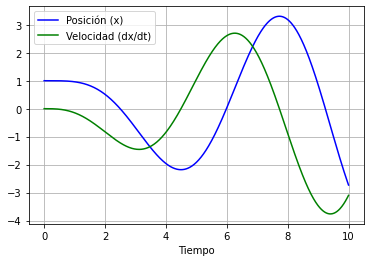

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def oscilador(x, t, m, c, k, F0, omega):
    dxdt = [x[1], (F0 * np.cos(omega * t) - k * x[0] - c * x[1]) / m]
    return dxdt

# Parámetros del sistema
m = 1.0       # masa
c = 0.1       # coeficiente de amortiguamiento
k = 1.0       # constante del resorte
F0 = 1.0      # amplitud de la fuerza de excitación
omega = 1.0   # frecuencia angular de la fuerza de excitación

# Condiciones iniciales
x0 = [1.0, 0.0]  # posición inicial y velocidad inicial
t = np.linspace(0, 10, 1000)  # vector de tiempo

# Resolver la ecuación diferencial
x = odeint(oscilador, x0, t, args=(m, c, k, F0, omega))

# Graficar la solución
plt.plot(t, x[:, 0], 'b', label='Posición (x)')
plt.plot(t, x[:, 1], 'g', label='Velocidad (dx/dt)')
plt.legend(loc='best')
plt.xlabel('Tiempo')
plt.grid()
plt.show()

Método de Euler:

In [3]:
def euler(f, x0, y0, h, n):
    """
    Método de Euler para resolver una ecuación diferencial ordinaria de primer orden.
    
    Args:
    - f: Función que representa la ecuación diferencial (dy/dx = f(x, y)).
    - x0: Valor inicial de x.
    - y0: Valor inicial de y(x0).
    - h: Tamaño del paso de integración.
    - n: Número de pasos de integración.
    
    Returns:
    - Lista de tuplas (x, y) con los valores aproximados de la solución.
    """
    result = [(x0, y0)]
    x = x0
    y = y0
    for _ in range(n):
        y += h * f(x, y)
        x += h
        result.append((x, y))
    return result

# Ejemplo de uso:
def f(x, y):
    return x + y

solucion_euler = euler(f, 0, 1, 0.1, 10)
print(solucion_euler)


[(0, 1), (0.1, 1.1), (0.2, 1.2200000000000002), (0.30000000000000004, 1.362), (0.4, 1.5282), (0.5, 1.72102), (0.6, 1.943122), (0.7, 2.1974342), (0.7999999999999999, 2.48717762), (0.8999999999999999, 2.8158953820000003), (0.9999999999999999, 3.1874849202)]


Método de Runge-Kutta de Cuarto Orden (RK4):

In [4]:
def rk4(f, x0, y0, h, n):
    """
    Método de Runge-Kutta de cuarto orden para resolver una ecuación diferencial ordinaria de primer orden.
    
    Args:
    - f: Función que representa la ecuación diferencial (dy/dx = f(x, y)).
    - x0: Valor inicial de x.
    - y0: Valor inicial de y(x0).
    - h: Tamaño del paso de integración.
    - n: Número de pasos de integración.
    
    Returns:
    - Lista de tuplas (x, y) con los valores aproximados de la solución.
    """
    result = [(x0, y0)]
    x = x0
    y = y0
    for _ in range(n):
        k1 = h * f(x, y)
        k2 = h * f(x + 0.5*h, y + 0.5*k1)
        k3 = h * f(x + 0.5*h, y + 0.5*k2)
        k4 = h * f(x + h, y + k3)
        y += (k1 + 2*k2 + 2*k3 + k4) / 6
        x += h
        result.append((x, y))
    return result

# Ejemplo de uso:
solucion_rk4 = rk4(f, 0, 1, 0.1, 10)
print(solucion_rk4)


[(0, 1), (0.1, 1.1103416666666668), (0.2, 1.242805141701389), (0.30000000000000004, 1.3997169941250756), (0.4, 1.5836484801613715), (0.5, 1.7974412771936765), (0.6, 2.0442359241838663), (0.7, 2.327503253193554), (0.7999999999999999, 2.651079126584631), (0.8999999999999999, 3.019202827560142), (0.9999999999999999, 3.436559488270332)]


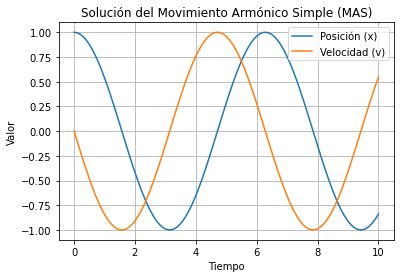

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, x, v, k):
    return v, -k*x

def rk4(f, x0, v0, k, h, n):
    result_x = [x0]
    result_v = [v0]
    x = x0
    v = v0
    for _ in range(n):
        k1x, k1v = f(_, x, v, k)
        k2x, k2v = f(_ + 0.5*h, x + 0.5*h*k1x, v + 0.5*h*k1v, k)
        k3x, k3v = f(_ + 0.5*h, x + 0.5*h*k2x, v + 0.5*h*k2v, k)
        k4x, k4v = f(_ + h, x + h*k3x, v + h*k3v, k)
        x += h * (k1x + 2*k2x + 2*k3x + k4x) / 6
        v += h * (k1v + 2*k2v + 2*k3v + k4v) / 6
        result_x.append(x)
        result_v.append(v)
    return result_x, result_v

# Parámetros
m = 1  # Masa
k = 1  # Constante del resorte
x0 = 1 # Posición inicial
v0 = 0 # Velocidad inicial
h = 0.1 # Tamaño de paso
n = 100 # Número de pasos

# Resolución de la EDO
sol_x, sol_v = rk4(f, x0, v0, k, h, n)

# Graficar la solución
t_values = np.linspace(0, n*h, n+1)
plt.plot(t_values, sol_x, label='Posición (x)')
plt.plot(t_values, sol_v, label='Velocidad (v)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Solución del Movimiento Armónico Simple (MAS)')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\sebas\AppData\Local\Temp/ipykernel_42648/195030099.py:21: RuntimeWarning: overflow encountered in matmul
  k2 = H @ (psi + 0.5*k1)
C:\Users\sebas\AppData\Local\Temp/ipykernel_42648/195030099.py:21: RuntimeWarning: invalid value encountered in matmul
  k2 = H @ (psi + 0.5*k1)


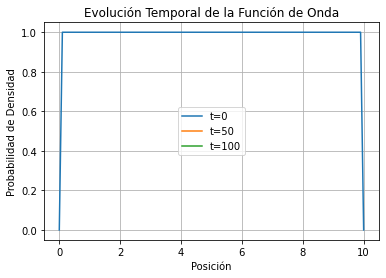

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def schrodinger_eq(x, psi, L):
    h_bar = 1  # Constante reducida de Planck
    m = 1      # Masa de la partícula
    V = 0      # Potencial nulo dentro de la caja
    dx = x[1] - x[0]
    
    # Operador Laplaciano discreto
    laplacian = (np.roll(psi, -1) - 2*psi + np.roll(psi, 1)) / dx**2
    
    # Potencial
    V_matrix = V * np.eye(len(x))
    
    # Hamiltoniano discreto
    H = -(h_bar**2 / (2 * m)) * laplacian + V_matrix
    
    # Evolución temporal mediante RK4
    k1 = H @ psi
    k2 = H @ (psi + 0.5*k1)
    k3 = H @ (psi + 0.5*k2)
    k4 = H @ (psi + k3)
    psi_new = psi + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    # Condiciones de contorno
    psi_new[0] = 0
    psi_new[-1] = 0
    
    return psi_new

# Parámetros
L = 10         # Longitud de la caja
N = 100        # Número de puntos en la malla
x = np.linspace(0, L, N)   # Malla de puntos
dx = x[1] - x[0]  # Tamaño de paso
psi = np.zeros(N) # Función de onda inicial
psi[1:-1] = 1     # Condición inicial: partícula confinada en la caja

# Evolución temporal mediante RK4
psi_values = [psi]
for _ in range(100):
    psi = schrodinger_eq(x, psi, L)
    psi_values.append(psi)

# Graficar la función de onda resultante
plt.plot(x, np.abs(psi_values[0])**2, label='t=0')
plt.plot(x, np.abs(psi_values[50])**2, label='t=50')
plt.plot(x, np.abs(psi_values[100])**2, label='t=100')
plt.xlabel('Posición')
plt.ylabel('Probabilidad de Densidad')
plt.title('Evolución Temporal de la Función de Onda')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
import numpy as np

def f(t, y):
    """
    Función que representa la ecuación diferencial de segundo orden.
    y[0] representa la posición y y[1] representa la velocidad.
    """
    m = 1  # Masa
    k = 1  # Constante del resorte
    return [y[1], -k * y[0] / m]

def rk4_step(t, y, h):
    """
    Un paso del método de Runge-Kutta de cuarto orden.
    """
    k1 = f(t, y)
    k2 = f(t + h/2, [y[i] + h/2 * k1[i] for i in range(len(y))])
    k3 = f(t + h/2, [y[i] + h/2 * k2[i] for i in range(len(y))])
    k4 = f(t + h, [y[i] + h * k3[i] for i in range(len(y))])
    return [y[i] + h/6 * (k1[i] + 2*k2[i] + 2*k3[i] + k4[i]) for i in range(len(y))]

# Condiciones iniciales
t0 = 0
y0 = [1, 0]  # [posición inicial, velocidad inicial]

# Parámetros de la simulación
h = 0.1  # Tamaño del paso
t_max = 10  # Tiempo máximo

# Simulación
t = t0
y = y0
while t < t_max:
    y = rk4_step(t, y, h)
    t += h

print("Resultado final:")
print("Tiempo:", t)
print("Posición:", y[0])
print("Velocidad:", y[1])


Resultado final:
Tiempo: 10.09999999999998
Posición: -0.7805728755749317
Velocidad: 0.625063664672126


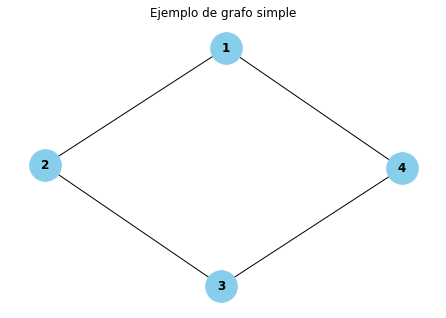

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos
G.add_nodes_from([1, 2, 3, 4])

# Agregar bordes
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

# Visualizar el grafo
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1000, font_size=12, font_weight='bold')
plt.title('Ejemplo de grafo simple')
plt.show()
